## Bibliotecas e carregando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import datetime as dt
import os
import folium

#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#.preprocessing import Imputer
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.feature_selection import SelectFromModel
#from sklearn.utils import shuffle
#from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', 100)

month_num = str(3)
path_to_save = './Tempo-Clima/Analise_dados/'

if not os.path.exists(str(path_to_save+month_num)):
    os.makedirs(str(path_to_save+month_num))
    os.makedirs(str(path_to_save+month_num+'/recovery_data_analise/'))
data = pd.read_csv('./Tempo-Clima/Dados/EMA/Unidos_v2/Brasil_v2/Brasil_'+month_num+'_v4.csv')
#data = data.drop(columns=['Unnamed: 0.1','Unnamed: 0','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'])

# Qual o tamanho da base?

In [2]:
data.shape

(3289008, 29)

# Retirando duplicações de dados e verificando o tamanho novamente

In [3]:
data.drop_duplicates()
data.shape

(3289008, 29)

# Informações da base

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289008 entries, 0 to 3289007
Data columns (total 29 columns):
Altitude(metros)                              float64
Codigo OMM                                    float64
Day                                           int64
H(UTC)                                        int64
Latitude                                      float64
Longitude                                     float64
Month                                         int64
Nome                                          object
PRECIPITACAO (mm)                             float64
PRESSAO ATMOSFERICA (hPa)                     float64
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              float64
PRESSAO ATMOSFÉRICA MINIMA (hPa)              float64
RADIACAO GLOBAL (KJ/M2)                       float64
TEMPERATURA DO AR (C)                         float64
TEMPERATURA DO PONTO DE ORVALHO (C)           float64
TEMPERATURA MAXIMA (C)                        float64
TEMPERATURA MINIMA (C)        

In [5]:
data.describe().T

count          mean  \
Altitude(metros)                            3289008.0    344.126474   
Codigo OMM                                  3287520.0  85355.889312   
Day                                         3289008.0     16.019571   
H(UTC)                                      3289008.0     11.500000   
Latitude                                    3289008.0    -15.879332   
Longitude                                   3289008.0    -47.768620   
Month                                       3289008.0      3.000000   
PRECIPITACAO (mm)                           2873287.0      0.232066   
PRESSAO ATMOSFERICA (hPa)                   2990356.0    965.503184   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2988936.0    965.787178   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2988948.0    965.210369   
RADIACAO GLOBAL (KJ/M2)                     1551508.0   1454.031341   
TEMPERATURA DO AR (C)                       3002116.0     24.495268   
TEMPERATURA DO PONTO DE ORVALHO (C)         2962271.0     19.767413   
TEMPERATURA MAXIMA (C)                      3001913.0     25.110256   
TEMPERATURA MINIMA (C)                      3001959.0     23.914212   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2962752.0     20.289327   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2961241.0     19.264568   
UMIDADE RELATIVA DO AR (%)                  2967766.0     77.299823   
UMIDADE RELATIVA DO MAXIMA AR (%)           2967175.0     80.050943   
UMIDADE RELATIVA DO MINIMA AR (%)           2965213.0     74.388888   
VENTO VELOCIDADE                            2948620.0      1.853524   
VENTO, DIRECAO (graus)                      2926596.0    155.026631   
VENTO, RAJADA MAXIMA (m/s)                  2947078.0      4.567545   
Year                                        3289008.0   2011.593220   

                                                    std           min  \
Altitude(metros)                             287.513135      1.001000   
Codigo OMM                                  2260.583332  81609.000000   
Day                                            8.942674      1.000000   
H(UTC)                                         6.922188      0.000000   
Latitude                                       8.164187    -33.742297   
Longitude                                      6.917957    -72.786778   
Month                                          0.000000      3.000000   
PRECIPITACAO (mm)                              1.654534      0.000000   
PRESSAO ATMOSFERICA (hPa)                     37.519177    810.200000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              37.533892    810.300000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              37.505619    809.500000   
RADIACAO GLOBAL (KJ/M2)                     1141.138944      0.000000   
TEMPERATURA DO AR (C)                          4.203284     -4.000000   
TEMPERATURA DO PONTO DE ORVALHO (C)            3.068045    -11.300000   
TEMPERATURA MAXIMA (C)                         4.374102     -9.800000   
TEMPERATURA MINIMA (C)                         4.029071     -9.600000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     3.030411    -21.400000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     3.144100    -28.800000   
UMIDADE RELATIVA DO AR (%)                    16.716864     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             15.519658      3.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             17.742306      3.000000   
VENTO VELOCIDADE                               1.584034      0.000000   
VENTO, DIRECAO (graus)                       100.730036      1.000000   
VENTO, RAJADA MAXIMA (m/s)                     2.810293      0.000000   
Year                                           3.175902   2001.000000   

                                                     25%           50%  \
Altitude(metros)                               75.000000    290.000000   
Codigo OMM                                  81976.000000  86731.000000   
Day                                             8.000000     16.000000   
H(UTC)

# NAO RODAR ISSO AGORA Retirando colunas dados que não seram usados

#data = data.drop(columns = ['PRESSAO ATMOSFERICA (hPa)','PRESSAO ATMOSFÉRICA MAXIMA (hPa)','PRESSAO ATMOSFÉRICA MINIMA (hPa)',
                                   'RADIACAO GLOBAL (KJ/M2)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                                    'VENTO VELOCIDADE ','VENTO, DIRECAO (graus)','VENTO, RAJADA MAXIMA (m/s)','Codigo OMM'
                                   ,'TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)','TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)'])
#data.columns

In [6]:
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257      3   
1             185.0     81963.0    1       1 -9.358353 -69.926257      3   
2             185.0     81963.0    1       2 -9.358353 -69.926257      3   
3             185.0     81963.0    1       3 -9.358353 -69.926257      3   
4             185.0     81963.0    1       4 -9.358353 -69.926257      3   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
0                      988.2                             988.2   
1                      988.6                             988.6   
2                      989.6                             989.6   
3                      989.8                             989.8   
4                      990.0                             990.1   

   PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
0                             987.6                      NaN   
1                             988.2                      NaN   
2                             988.6                      NaN   
3                             989.5                      NaN   
4                             989.8                      NaN   

   TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
0                   22.7                                 21.9   
1                   22.4                                 21.6   
2                   22.2                                 21.5   
3                   21.9                                 21.2   
4                   22.1                                 21.4   

   TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
0                    23.4                    22.7   
1                    23.0                    22.4   
2                    22.4                    22.2   
3                    22.3                    21.8   
4                    22.1                    21.8   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        22.4   
1                                        22.3   
2                                        21.8   
3                                        21.6   
4                                        21.4   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        21.9                        95.0   
1                                        21.6                        96.0   
2                                        21.5                        96.0   
3                                        21.2                        96.0   
4                                        21.2                        96.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  \
0                               95.0                               94.0   
1                               96.0                               95.0   
2                               96.0                               95.0   
3                               96.0                               96.0   
4                               96.0                               96.0   

   VENTO VELOCIDADE   VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  \
0                0.2                    19.0                         1.1   
1                0.0                    40.0                         1.5   
2                0.0                   239.0                         0.9   
3                0.0                    22.0                         0.6   
4                0.0                   321.0                         0.6   

   Year                     Cidade Estado Regiao  


In [7]:
data.tail(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
3289003               6.0     86618.0   31      19 -10.473959 -36.482051   
3289004               6.0     86618.0   31      20 -10.473959 -36.482051   
3289005               6.0     86618.0   31      21 -10.473959 -36.482051   
3289006               6.0     86618.0   31      22 -10.473959 -36.482051   
3289007               6.0     86618.0   31      23 -10.473959 -36.482051   

         Month               Nome  PRECIPITACAO (mm)  \
3289003      3  Brejo Grande-A421                0.0   
3289004      3  Brejo Grande-A421                0.0   
3289005      3  Brejo Grande-A421                0.0   
3289006      3  Brejo Grande-A421                0.0   
3289007      3  Brejo Grande-A421                0.0   

         PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
3289003                     1013.8                            1013.9   
3289004                     1014.0                            1014.0   
3289005                     1014.3                            1014.4   
3289006                     1014.7                            1014.7   
3289007                     1015.3                            1015.3   

         PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
3289003                            1013.7                 1290.091   
3289004                            1013.7                  418.188   
3289005                            1014.0                   28.543   
3289006                            1014.3                      NaN   
3289007                            1014.7                      NaN   

         TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
3289003                   30.1                                 21.2   
3289004                   28.2                                 20.7   
3289005                   27.0                                 20.5   
3289006                   26.3                                 20.5   
3289007                   26.4                                 20.3   

         TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
3289003                    30.9                    29.2   
3289004                    30.1                    28.2   
3289005                    28.2                    27.0   
3289006                    27.0                    26.3   
3289007                    26.6                    25.7   

         TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
3289003                                        22.0   
3289004                                        21.7   
3289005                                        21.0   
3289006                                        20.6   
3289007                                        20.9   

         TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
3289003                                        20.4   
3289004                                        20.4   
3289005                                        20.5   
3289006                                        20.2   
3289007                                        20.3   

         UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
3289003                        59.0                               64.0   
3289004                        64.0                               67.0   
3289005                        68.0                               69.0   
3289006                        71.0                               71.0   
3289007                        69.0                               73.0   

         UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
3289003                               56.0                1.9   
3289004                               59.0                1.3   
3289005                               64.0                0.7   
3289006                               68.0                0.4   
3289007                               68.0                0.6   

         VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year  \
3289003     

# Temos muitos dados ausentes?

In [8]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.045242
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                             12.639708
PRESSAO ATMOSFERICA (hPa)                      9.080306
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               9.123480
PRESSAO ATMOSFÉRICA MINIMA (hPa)               9.123116
RADIACAO GLOBAL (KJ/M2)                       52.827479
TEMPERATURA DO AR (C)                          8.722752
TEMPERATURA DO PONTO DE ORVALHO (C)            9.934211
TEMPERATURA MAXIMA (C)                         8.728924
TEMPERATURA MINIMA (C)                         8.727525
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     9

In [9]:
data.dropna().shape

(1414646, 29)

In [10]:
data.shape[0] - data.dropna().shape[0]

1874362

In [11]:
((data<0).sum()/len(data))*100

Altitude(metros)                                0.000000
Codigo OMM                                      0.000000
Day                                             0.000000
H(UTC)                                          0.000000
Latitude                                       99.253514
Longitude                                     100.000000
Month                                           0.000000
Nome                                          100.000000
PRECIPITACAO (mm)                               0.000000
PRESSAO ATMOSFERICA (hPa)                       0.000000
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                0.000000
PRESSAO ATMOSFÉRICA MINIMA (hPa)                0.000000
RADIACAO GLOBAL (KJ/M2)                         0.000000
TEMPERATURA DO AR (C)                           0.000152
TEMPERATURA DO PONTO DE ORVALHO (C)             0.023594
TEMPERATURA MAXIMA (C)                          0.000122
TEMPERATURA MINIMA (C)                          0.000243
TEMPERATURA MÁXIMA DO PONTO DE 

# Quais os valores minimos e maximos?

In [12]:
data.min()

Altitude(metros)                                      1.001
Codigo OMM                                            81609
Day                                                       1
H(UTC)                                                    0
Latitude                                           -33.7423
Longitude                                          -72.7868
Month                                                     3
Nome                                          Abrolhos-A422
PRECIPITACAO (mm)                                         0
PRESSAO ATMOSFERICA (hPa)                             810.2
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                      810.3
PRESSAO ATMOSFÉRICA MINIMA (hPa)                      809.5
RADIACAO GLOBAL (KJ/M2)                                   0
TEMPERATURA DO AR (C)                                    -4
TEMPERATURA DO PONTO DE ORVALHO (C)                   -11.3
TEMPERATURA MAXIMA (C)                                 -9.8
TEMPERATURA MINIMA (C)                  

In [13]:
data.max()

Altitude(metros)                                      997
Codigo OMM                                          86998
Day                                                    31
H(UTC)                                                 23
Latitude                                          3.81358
Longitude                                        -34.8156
Month                                                   3
Nome                                          Óbidos-A232
PRECIPITACAO (mm)                                    94.4
PRESSAO ATMOSFERICA (hPa)                            1050
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                   1049.2
PRESSAO ATMOSFÉRICA MINIMA (hPa)                   1049.6
RADIACAO GLOBAL (KJ/M2)                             45173
TEMPERATURA DO AR (C)                                44.3
TEMPERATURA DO PONTO DE ORVALHO (C)                  42.4
TEMPERATURA MAXIMA (C)                                 45
TEMPERATURA MINIMA (C)                               44.9
TEMPERATURA MÁ

# Matriz de correlação dos dados

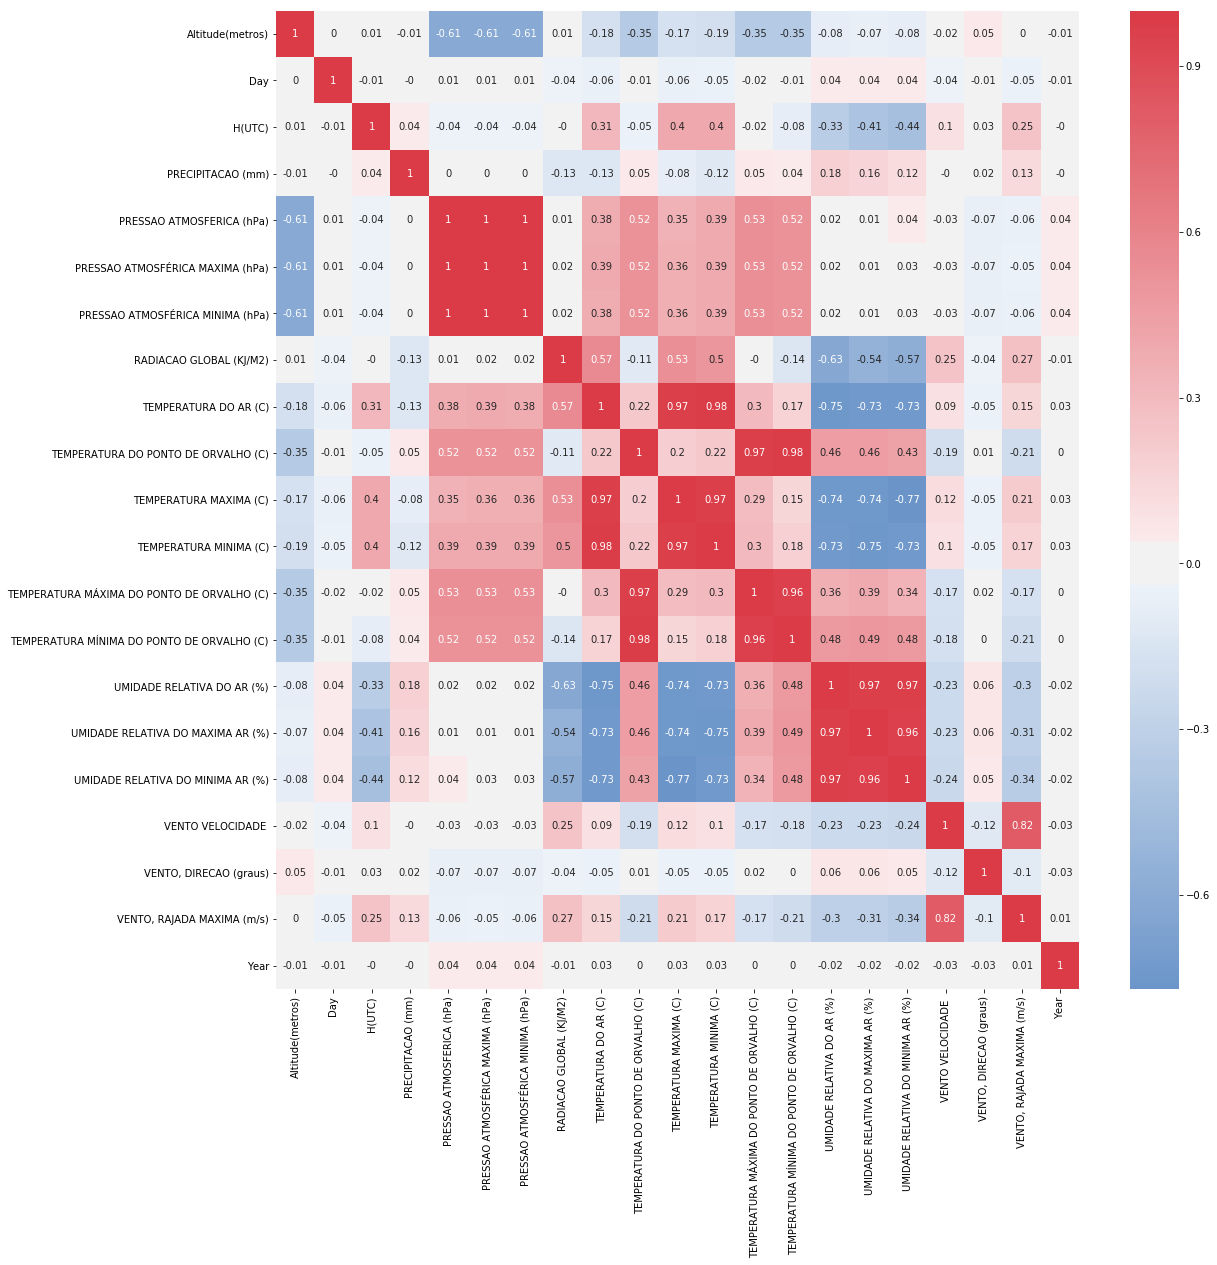

In [14]:
all_columns_num = data.columns.tolist()
all_columns_num.remove('Nome')
all_columns_num.remove('Month')
all_columns_num.remove('Latitude')
all_columns_num.remove('Longitude')
all_columns_num.remove('Codigo OMM')
all_columns_num.remove('Cidade')
all_columns_num.remove('Estado')
all_columns_num.remove('Regiao')
data_clean = data.dropna()
cor_matrix = data_clean[all_columns_num].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

## Fazendo um mapa para verificar como esta cada estação em relação a dados ausentes e a consistencias dos dados

In [ ]:
def make_marker(name,lat,long,alt, temp_min,temp_max, temp_min_min,temp_min_max,
                temp_max_min,temp_max_max, prep_min,prep_max, ur_min,ur_max,
                ur_min_min,ur_min_max, ur_max_min,ur_max_max, miss_data_temp_min,
                miss_data_temp_max, miss_data_prep, miss_data_ur_min, miss_data_ur_max,
                miss_data_ur,color):
    return folium.Marker(location=[df_temp['Latitude'].unique()[0],df_temp['Longitude'].unique()[0]], 
                 popup='''
                 Name: {:s}
                 Latitude:{:f}
                 longitude:{:f}
                 Altitude(metros) : {:f}
                 Minimos e Maximos
                 
                 Temperatura do ar: {:f}\t{:f}
                 Temperatura Minima: {:f}\t{:F}
                 Temperatura Maxima:  {:f}\t{:f}
                 Precipitação: {:f}\t{:f}
                 Umidade Relativa: {:f}\t{:f}
                 UR Minima: {:f}\t{:f}
                 UR Maxima: {:f}\t{:f}
                 
                 Dados Ausentes
                 
                 Temperatura Minima: {:f}
                 Temperatura Maxima: {:f}
                 Precipitação: {:f}
                 UR Minima: {:f}
                 UR Maxima: {:f}
                 UR:{:f}
                 '''.format(name,lat,long,alt,
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur), 
                icon=folium.Icon(color=color))

### Problemas procurados

##### - Temperatura minima              > Temperatura Maxima
##### - Temperatura(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Temperatura minima do Ponto de Orvalho              > Temperatura Maxima do Ponto de Orvalho
##### - Temperatura do Ponto de Orvalho(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Umidade Relativa(min,max,do ar) < 0 OU Umidade Relativa(min,max,do ar)   >100
##### - Umidade relativa minima         > Umidade relativa maxima
##### - Dados ausentes > 30

In [ ]:
#Grupo de marcadores para possivel problemas
fg_miss_data          =      folium.FeatureGroup(name='Miss Data')
fg_temp_inconsistency =      folium.FeatureGroup(name='Temp correlation Inconsistency')
fg_temp_min           =      folium.FeatureGroup(name='Temp minima Inconsistency')
fg_temp               =      folium.FeatureGroup(name='Temp air Inconsistency')
fg_temp_max           =      folium.FeatureGroup(name='Temp Maxima Inconsistency')
fg_ur_inconsistency   =      folium.FeatureGroup(name='Umildade Relatica Inconsistency')

df_miss_data = pd.DataFrame(columns = ['Estação','Md_temp_max','Md_temp_min','Md_temp','Md_ur_max','Md_ur_min','MD_ur','Md_prec'])

recovery_list = []
danger_list = []
temp_min_list = []
temp_max_list = []
temp_inconsistency_list = []
temp_list = []
ur_list = []

for name in data['Nome'].unique().tolist():
    
    df_temp = data.loc[lambda df: df.Nome == name, :]
    #Maximo e minimos
    temp_min     = df_temp['TEMPERATURA DO AR (C)'].min()
    temp_max     = df_temp['TEMPERATURA DO AR (C)'].max()
    temp_min_min = df_temp['TEMPERATURA MINIMA (C)'].min()
    temp_min_max = df_temp['TEMPERATURA MINIMA (C)'].max()
    temp_max_min = df_temp['TEMPERATURA MAXIMA (C)'].min()
    temp_max_max = df_temp['TEMPERATURA MAXIMA (C)'].max()
    prep_max     = df_temp['PRECIPITACAO (mm)'].max()
    prep_min     = df_temp['PRECIPITACAO (mm)'].min()
    ur_max       = df_temp['UMIDADE RELATIVA DO AR (%)'].max()
    ur_min       = df_temp['UMIDADE RELATIVA DO AR (%)'].min()
    ur_max_max   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].max()
    ur_max_min   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].min()
    ur_min_max   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].max()
    ur_min_min   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].min()
    #Dados ausentes
    miss_data_temp     = (df_temp['TEMPERATURA DO AR (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA DO AR (C)']))*100
    miss_data_temp_min = (df_temp['TEMPERATURA MINIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MINIMA (C)']))*100
    miss_data_temp_max = (df_temp['TEMPERATURA MAXIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MAXIMA (C)']))*100
    miss_data_prep     = (df_temp['PRECIPITACAO (mm)'].isnull().sum()/
                          len(df_temp['PRECIPITACAO (mm)']))*100
    miss_data_ur_min   = (df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MINIMA AR (%)']))*100
    miss_data_ur_max   = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']))*100
    miss_data_ur       = (df_temp['UMIDADE RELATIVA DO AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO AR (%)']))*100
    #Estações com 10% a 50% de dados ausentes poderão ser interpolados
    miss_recovery = (miss_data_temp> 10 and miss_data_temp < 30,
                      miss_data_temp_min> 10 and miss_data_temp_min < 30,
                      miss_data_prep > 10 and miss_data_prep< 30,
                      miss_data_temp_max > 10 and miss_data_temp_max < 30,
                      miss_data_ur > 10 and miss_data_ur < 30,
                      miss_data_ur_max > 10 and miss_data_ur_max < 30,
                      miss_data_ur_min > 10 and miss_data_ur_min < 30)
    #Estações com 50% ou mais de dados ausentes poderam ser eliminadas
    miss_danger = (miss_data_temp > 30,miss_data_temp_min> 30,miss_data_prep> 30,
                   miss_data_temp_max> 30,miss_data_ur> 30,
                   miss_data_ur_max> 30,miss_data_ur_min > 30)
    
    df_miss_data = df_miss_data.append(pd.DataFrame([name,miss_data_temp_max,miss_data_temp_min,miss_data_temp,miss_data_ur_max,
              miss_data_ur_min,miss_data_ur,miss_data_prep], index = df_miss_data.columns.tolist()).T)
    if miss_danger == (1,1,1,1,1,1,1):
        color = 'red'
        danger_list.append(name)
    elif True in miss_recovery:
        color = 'purple'
        recovery_list.append(name)
    else:
        color = 'green'
    fg_miss_data.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
        
    temp_inconsistency = (df_temp['TEMPERATURA MAXIMA (C)'] <= df_temp['TEMPERATURA MINIMA (C)'])
    
    if True in temp_inconsistency:
        color = 'red'
        temp_inconsistency_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_max_min < 0) or (temp_max_max > 45):
        color = 'red'
        temp_max_list.append(name)
    else:
        color = 'green'
    fg_temp_max.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min < 0) or (temp_max > 45):
        color = 'red'
        temp_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min_min < 0) or (temp_min_max > 45):
        color = 'red'
        temp_min_list.append(name)
    else:
        color = 'green'
    
    fg_temp_min.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    ur_min_danger = (ur_min < 0, ur_max_min < 0, ur_min_min < 0 )
    ur_max_danger = (ur_max >100,ur_max_max>100,ur_min_max>100)
    ur_inconsistency = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'] <= df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'])
   
    if (True in ur_min_danger) or (True in ur_max_danger) or (True in ur_inconsistency):
        color = 'red'
        ur_list.append(name)
    else:
        color = 'green'
    fg_ur_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))

map_miss_data          = folium.Map()
map_temp_inconsistency = folium.Map()
map_temp_min           = folium.Map()
map_temp_max           = folium.Map()
map_ur_inconsistency   = folium.Map()
map_miss_data.add_child(fg_miss_data).save(str(path_to_save+month_num+'/map_'+month_num+'_miss_data.html'))
map_temp_inconsistency.add_child(fg_temp_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_temp_incosistency.html')
map_temp_min.add_child(fg_temp_min).save(path_to_save+month_num+'/map_'+month_num+'_temp_min.html')
map_temp_max.add_child(fg_temp_max).save(path_to_save+month_num+'/map_'+month_num+'_temp_max.html')
map_ur_inconsistency.add_child(fg_ur_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_ur_incosistency.html')

df_miss_data = df_miss_data.reset_index(drop=True)
df_miss_data.to_csv(str(path_to_save+month_num+'/'+'Data_miss.csv'))

# Analisando as possiveis incosistencia nos dados 
## Verificando os dados da Umidade relativa

In [66]:
len(ur_list)

1

In [21]:
ur_list

['Parque Estadual Chandless-A102']

In [67]:
df_temp = data.loc[lambda df: df.Nome == ur_list[0], :].reset_index()
errors = df_temp.loc[df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']<=df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'],:]['index'].tolist()
data.iloc[errors][['UMIDADE RELATIVA DO MAXIMA AR (%)','UMIDADE RELATIVA DO MINIMA AR (%)','UMIDADE RELATIVA DO AR (%)']].count()

UMIDADE RELATIVA DO MAXIMA AR (%)    957
UMIDADE RELATIVA DO MINIMA AR (%)    957
UMIDADE RELATIVA DO AR (%)           957
dtype: int64

Como podemos ver os dados de umidade estão todos iguais nestes registros, por isso iremos retila-los

In [68]:
data.loc[errors,'UMIDADE RELATIVA DO MAXIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO MINIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO AR (%)'] = np.nan

## Incosistencia nos dados de temperatura

In [6]:
temp_inconsistency_list

['Parque Estadual Chandless-A102']

### Foi encontrado apenas uma estação com incosistencia de dados de temperatura, vamos ver estes erros

In [69]:
df_temp = data.loc[lambda df: df.Nome == temp_inconsistency_list[0], :].reset_index()
errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<=df_temp['TEMPERATURA MINIMA (C)'],:]['index'].tolist()
data.iloc[errors].count()

Altitude(metros)                              24
Codigo OMM                                    24
Day                                           24
H(UTC)                                        24
Latitude                                      24
Longitude                                     24
Month                                         24
Nome                                          24
PRECIPITACAO (mm)                             24
PRESSAO ATMOSFERICA (hPa)                     24
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              24
PRESSAO ATMOSFÉRICA MINIMA (hPa)              24
RADIACAO GLOBAL (KJ/M2)                        6
TEMPERATURA DO AR (C)                         24
TEMPERATURA DO PONTO DE ORVALHO (C)           24
TEMPERATURA MAXIMA (C)                        24
TEMPERATURA MINIMA (C)                        24
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)    24
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)    24
UMIDADE RELATIVA DO AR (%)                    11
UMIDADE RELATIVA DO 

#### Apenas uma estação foi encontrada com incosistencia na temperatura, e este problema é por causa que os dados de temperatura estão todos iguais

In [70]:
data.loc[errors,'TEMPERATURA DO AR (C)'] = np.nan
data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

## Possiveis erros de temperatura maxima

In [9]:
len(temp_max_list)

3

In [101]:
temp_max_list

['Niquelândia-A004', 'Dionísio Cerqueira-A848']

In [29]:
map_temp_max

### Analisar os error

In [30]:
df_temp = data.loc[lambda df: df.Nome == temp_max_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:]

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
469583             664.0     86690.0   29      23 -14.469358 -48.485756   

        Month              Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
469583      3  Niquelândia-A004                0.0                      936.0   

        PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
469583                             936.0                             935.4   

        RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
469583                      NaN                    NaN   

        TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
469583                                  NaN                    -9.8   

        TEMPERATURA MINIMA (C)  TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
469583                     NaN                                         NaN   

        TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
469583                                         NaN   

        UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
469583                        53.0                               54.0   

        UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
469583                               46.0                1.0   

        VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year       Cidade  \
469583                   128.0                         1.9  2007  Niquelândia   

       Estado        Regiao  
469583  Goiás  Centro Oeste

In [31]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [100]:
df_temp = data.loc[lambda df: df.Nome == temp_max_list[1], :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','Day','Year','H(UTC)']]

Empty DataFrame
Columns: [TEMPERATURA MINIMA (C), TEMPERATURA MAXIMA (C), Day, Year, H(UTC)]
Index: []

In [33]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [34]:
df_temp = data.loc[lambda df: df.Nome == temp_max_list[2], :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:]

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
1354688             808.0     86936.0    5       8 -26.286562 -53.633114   

         Month                     Nome  PRECIPITACAO (mm)  \
1354688      3  Dionísio Cerqueira-A848                NaN   

         PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
1354688                      918.9                             919.6   

         PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
1354688                             918.5                      NaN   

         TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
1354688                    NaN                                  NaN   

         TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
1354688                    -8.2                     NaN   

         TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
1354688                                         NaN   

         TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
1354688                                         NaN   

         UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
1354688                         NaN                                NaN   

         UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
1354688                                NaN                NaN   

         VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year  \
1354688                     NaN                         0.0  2013   

                     Cidade          Estado Regiao  
1354688  Dionísio Cerqueira  Santa Catarina    Sul

In [35]:
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

### Os registros de 'Niquelândia-A004' e 'Dionísio Cerqueira-A848' estão fora do padrão climatico do local para o mes de março ja para 'Morro da Igreja (Bom Jardim da Serra)-A845', eu tenho minhas duvidas, ja que esta estação fica proximo ao mar e temos outros registros semelhantes em outros anos. creio que ela irá aparecer na proxima analise (de temperatura minima).

### por isso os registros de morro da ingreja não serão retirados.

In [71]:
temp_max_list.remove('Morro da Igreja (Bom Jardim da Serra)-A845')
temp_max_list

['Niquelândia-A004', 'Dionísio Cerqueira-A848']

In [72]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan

In [73]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan

## Possiveis erros de temperatura minima

In [102]:
len(temp_min_list)

2

In [15]:
temp_min_list

['Goiânia-A002',
 'Morro da Igreja (Bom Jardim da Serra)-A845',
 'Dionísio Cerqueira-A848']

In [40]:
map_temp_min

In [44]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
448060             727.0     86734.0    1       4 -16.642841 -49.220222   
448591             727.0     86734.0   23       7 -16.642841 -49.220222   
448592             727.0     86734.0   23       8 -16.642841 -49.220222   

        Month          Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
448060      3  Goiânia-A002                0.0                      933.6   
448591      3  Goiânia-A002                0.0                      929.3   
448592      3  Goiânia-A002                0.0                      929.2   

        PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
448060                             933.8                             933.5   
448591                             929.7                             929.3   
448592                             929.3                             929.2   

        RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
448060                      NaN                   -0.6   
448591                      NaN                    5.6   
448592                      NaN                   15.4   

        TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
448060                                  NaN                    20.8   
448591                                  4.4                    20.4   
448592                                 14.3                    17.2   

        TEMPERATURA MINIMA (C)  TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
448060                    -1.5                                        19.0   
448591                    -7.9                                        19.1   
448592                    -9.6                                         NaN   

        TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
448060                                        -2.6   
448591                                        -6.7   
448592                                         NaN   

        UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
448060                        90.0                               90.0   
448591                        92.0                               92.0   
448592                        93.0                               93.0   

        UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
448060                               89.0                0.2   
448591                               92.0                0.0   
448592                               92.0                0.4   

        VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year   Cidade  \
448060                   238.0                         2.2  2009  Goiânia   
448591                   281.0                         1.1  2009  Goiânia   
448592                    44.0                         1.3  2009  Goiânia   

       Estado        Regiao  
448060  Goias  Centro Oeste  
448591  Goias  Centro Oeste  
448592  Goias  Centro Oeste

In [45]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [46]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[1], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
1347601              1.79     86968.0   20       1 -28.126992  -49.47961   
1348537              1.79     86968.0   28       1 -28.126992  -49.47961   
1348538              1.79     86968.0   28       2 -28.126992  -49.47961   
1348539              1.79     86968.0   28       3 -28.126992  -49.47961   
1348540              1.79     86968.0   28       4 -28.126992  -49.47961   
1348541              1.79     86968.0   28       5 -28.126992  -49.47961   
1348542              1.79     86968.0   28       6 -28.126992  -49.47961   
1348543              1.79     86968.0   28       7 -28.126992  -49.47961   
1348544              1.79     86968.0   28       8 -28.126992  -49.47961   
1348545              1.79     86968.0   28       9 -28.126992  -49.47961   
1348546              1.79     86968.0   28      10 -28.126992  -49.47961   
1348547              1.79     86968.0   28      11 -28.126992  -49.47961   
1348548              1.79     86968.0   28      12 -28.126992  -49.47961   
1348549              1.79     86968.0   28      13 -28.126992  -49.47961   
1348564              1.79     86968.0   29       4 -28.126992  -49.47961   
1348565              1.79     86968.0   29       5 -28.126992  -49.47961   
1348566              1.79     86968.0   29       6 -28.126992  -49.47961   
1348567              1.79     86968.0   29       7 -28.126992  -49.47961   
1348568              1.79     86968.0   29       8 -28.126992  -49.47961   
1348571              1.79     86968.0   29      11 -28.126992  -49.47961   
1349045              1.79     86968.0   18       5 -28.126992  -49.47961   
1349046              1.79     86968.0   18       6 -28.126992  -49.47961   
1349047              1.79     86968.0   18       7 -28.126992  -49.47961   
1349048              1.79     86968.0   18       8 -28.126992  -49.47961   
1349049              1.79     86968.0   18       9 -28.126992  -49.47961   
1349050              1.79     86968.0   18      10 -28.126992  -49.47961   
1349905              1.79     86968.0   23       1 -28.126992  -49.47961   
1349906              1.79     86968.0   23       2 -28.126992  -49.47961   
1349907              1.79     86968.0   23       3 -28.126992  -49.47961   
1349908              1.79     86968.0   23       4 -28.126992  -49.47961   
1349909              1.79     86968.0   23       5 -28.126992  -49.47961   
1349910              1.79     86968.0   23       6 -28.126992  -49.47961   
1349911              1.79     86968.0   23       7 -28.126992  -49.47961   
1349912              1.79     86968.0   23       8 -28.126992  -49.47961   
1349913              1.79     86968.0   23       9 -28.126992  -49.47961   
1349914              1.79     86968.0   23      10 -28.126992  -49.47961   
1349915              1.79     86968.0   23      11 -28.126992  -49.47961   
1349916              1.79     86968.0   23      12 -28.126992  -49.47961   

         Month                                        Nome  PRECIPITACAO (mm)  \
1347601      3  Morro da Igreja (Bom Jardim da Serra)-A845                0.0   
1348537      3  Morro da Igreja (Bom Jardim da Serra)-A845                0.0   
1348538      3  Morro da Igreja (Bom Jardim da Serra)-A845                0.0   
1348539      3  Morro da Igreja (Bom Jardim da Serra)-A845                0.0   
1348540      3  Morro da Igreja (Bom Jardim da Serra)-A845                0.0   
1348541      3  Morro da Igreja (Bom Jardim da Serra)-A845                0.0   
1348542      3  Morro da Igreja (Bom Jardim da Serra)-A845                0.0   
1348543      3  Morro da Igreja (Bom Jardim da Serra)-A845                0.0   
1348544      3  Morro da Igreja (Bom Jardim da Serra)-A845                0.0   
1348545      3  Morro da Igreja (Bom Jardim da Serra)-A845                0.0   
1348546      3  Morro da Igreja (Bom Jardim da Serra)-A845                0.0   
1348547      3  Morro da Igreja (Bom Jardim da Serra)-A845              

In [47]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

In [48]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[2], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
1354750             808.0     86936.0    7      22 -26.286562 -53.633114   

         Month                     Nome  PRECIPITACAO (mm)  \
1354750      3  Dionísio Cerqueira-A848                NaN   

         PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
1354750                      922.3                             922.4   

         PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
1354750                             922.1                      NaN   

         TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
1354750                    NaN                                  NaN   

         TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
1354750                     NaN                    -0.6   

         TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
1354750                                         NaN   

         TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
1354750                                         NaN   

         UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
1354750                         NaN                                NaN   

         UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
1354750                                NaN                NaN   

         VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year  \
1354750                     NaN                         0.0  2013   

                     Cidade          Estado Regiao  
1354750  Dionísio Cerqueira  Santa Catarina    Sul

In [49]:
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]

Empty DataFrame
Columns: [Altitude(metros), Codigo OMM, Day, H(UTC), Latitude, Longitude, Month, Nome, PRECIPITACAO (mm), PRESSAO ATMOSFERICA (hPa), PRESSAO ATMOSFÉRICA MAXIMA (hPa), PRESSAO ATMOSFÉRICA MINIMA (hPa), RADIACAO GLOBAL (KJ/M2), TEMPERATURA DO AR (C), TEMPERATURA DO PONTO DE ORVALHO (C), TEMPERATURA MAXIMA (C), TEMPERATURA MINIMA (C), TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C), TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C), UMIDADE RELATIVA DO AR (%), UMIDADE RELATIVA DO MAXIMA AR (%), UMIDADE RELATIVA DO MINIMA AR (%), VENTO VELOCIDADE , VENTO, DIRECAO (graus), VENTO, RAJADA MAXIMA (m/s), Year, Cidade, Estado, Regiao]
Index: []

Mesmo caso do atribulto anterior, e as cidades encontradas nao tem registros de temperatura encontradas tão baixas

In [74]:
temp_min_list.remove('Morro da Igreja (Bom Jardim da Serra)-A845')
temp_min_list

['Goiânia-A002', 'Dionísio Cerqueira-A848']

In [75]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

In [76]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

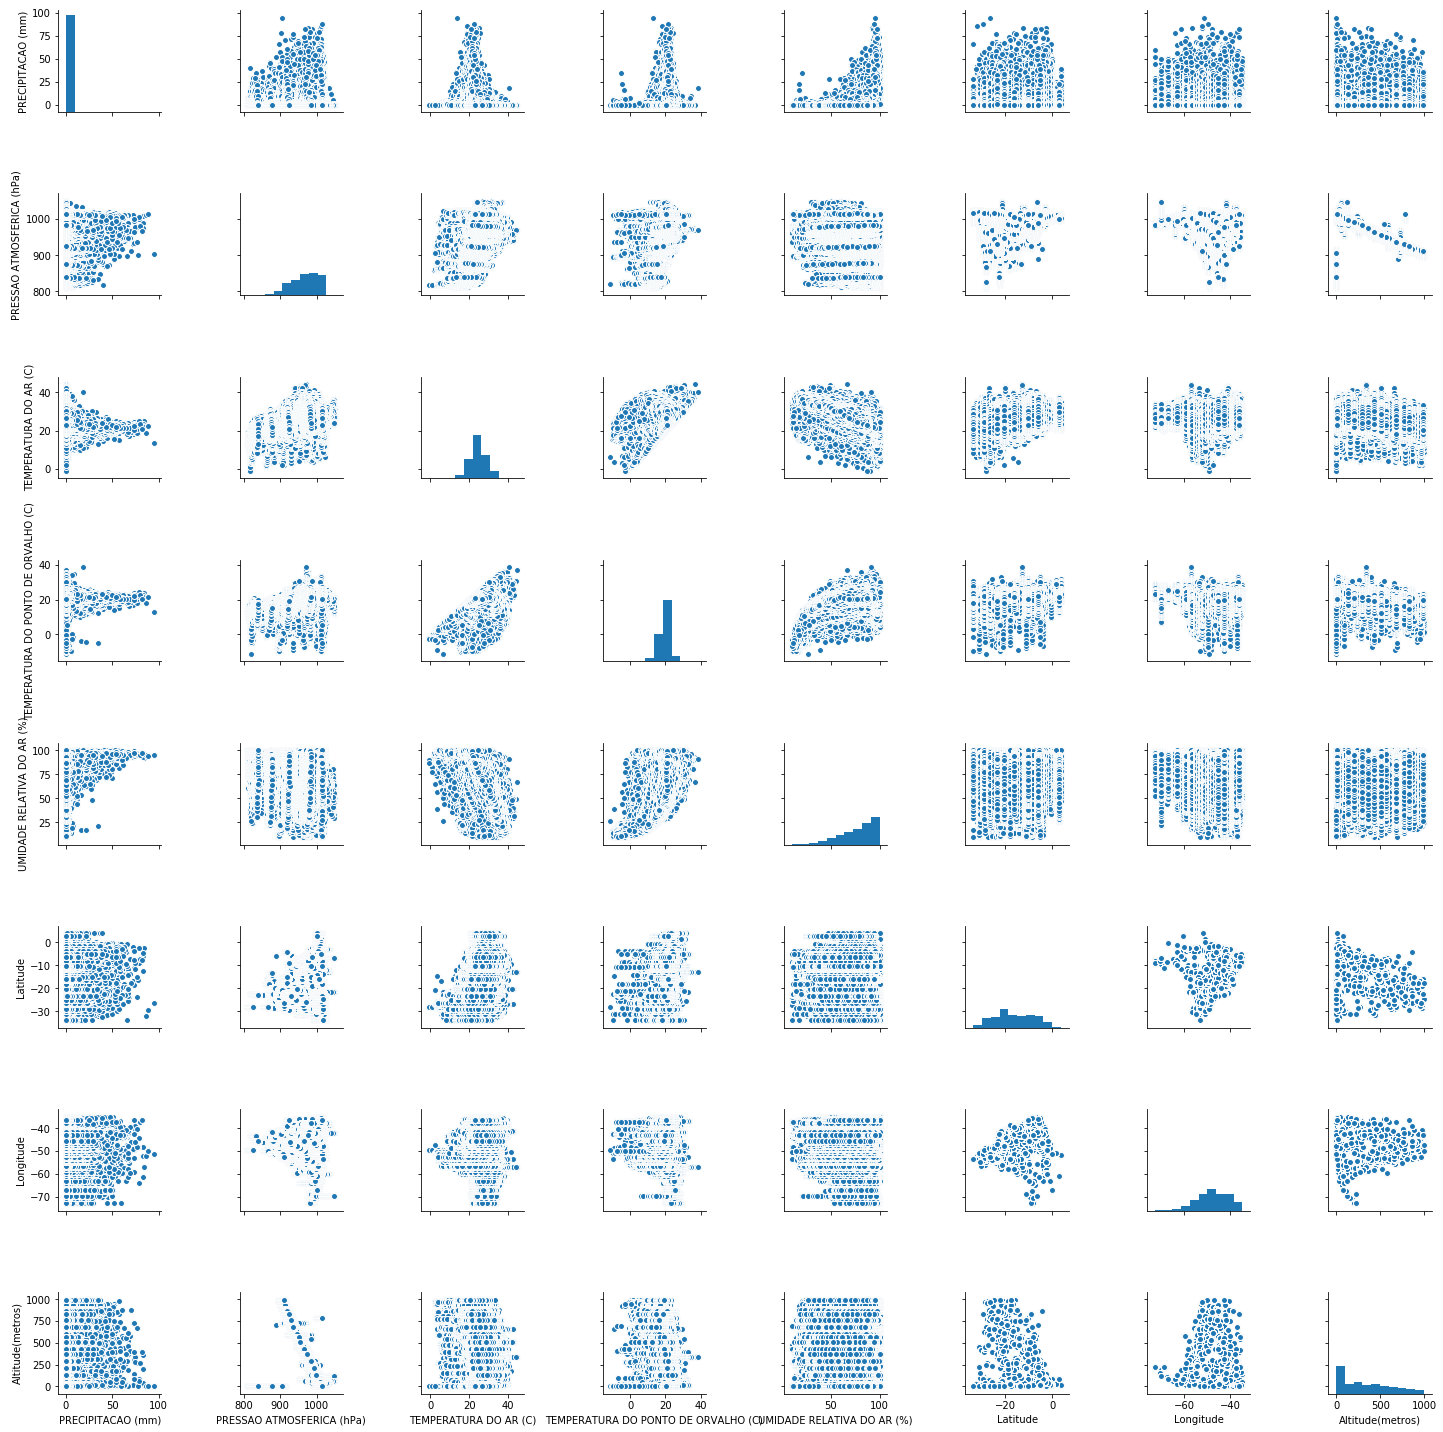

In [54]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

#### Como podemos ver existe alguns dados fora do padrão dos demais registro, como os dados de Pressão atmosferica que podemos perceber que sua relação com Altidude não esta muito correta. iremos retirar este dados também

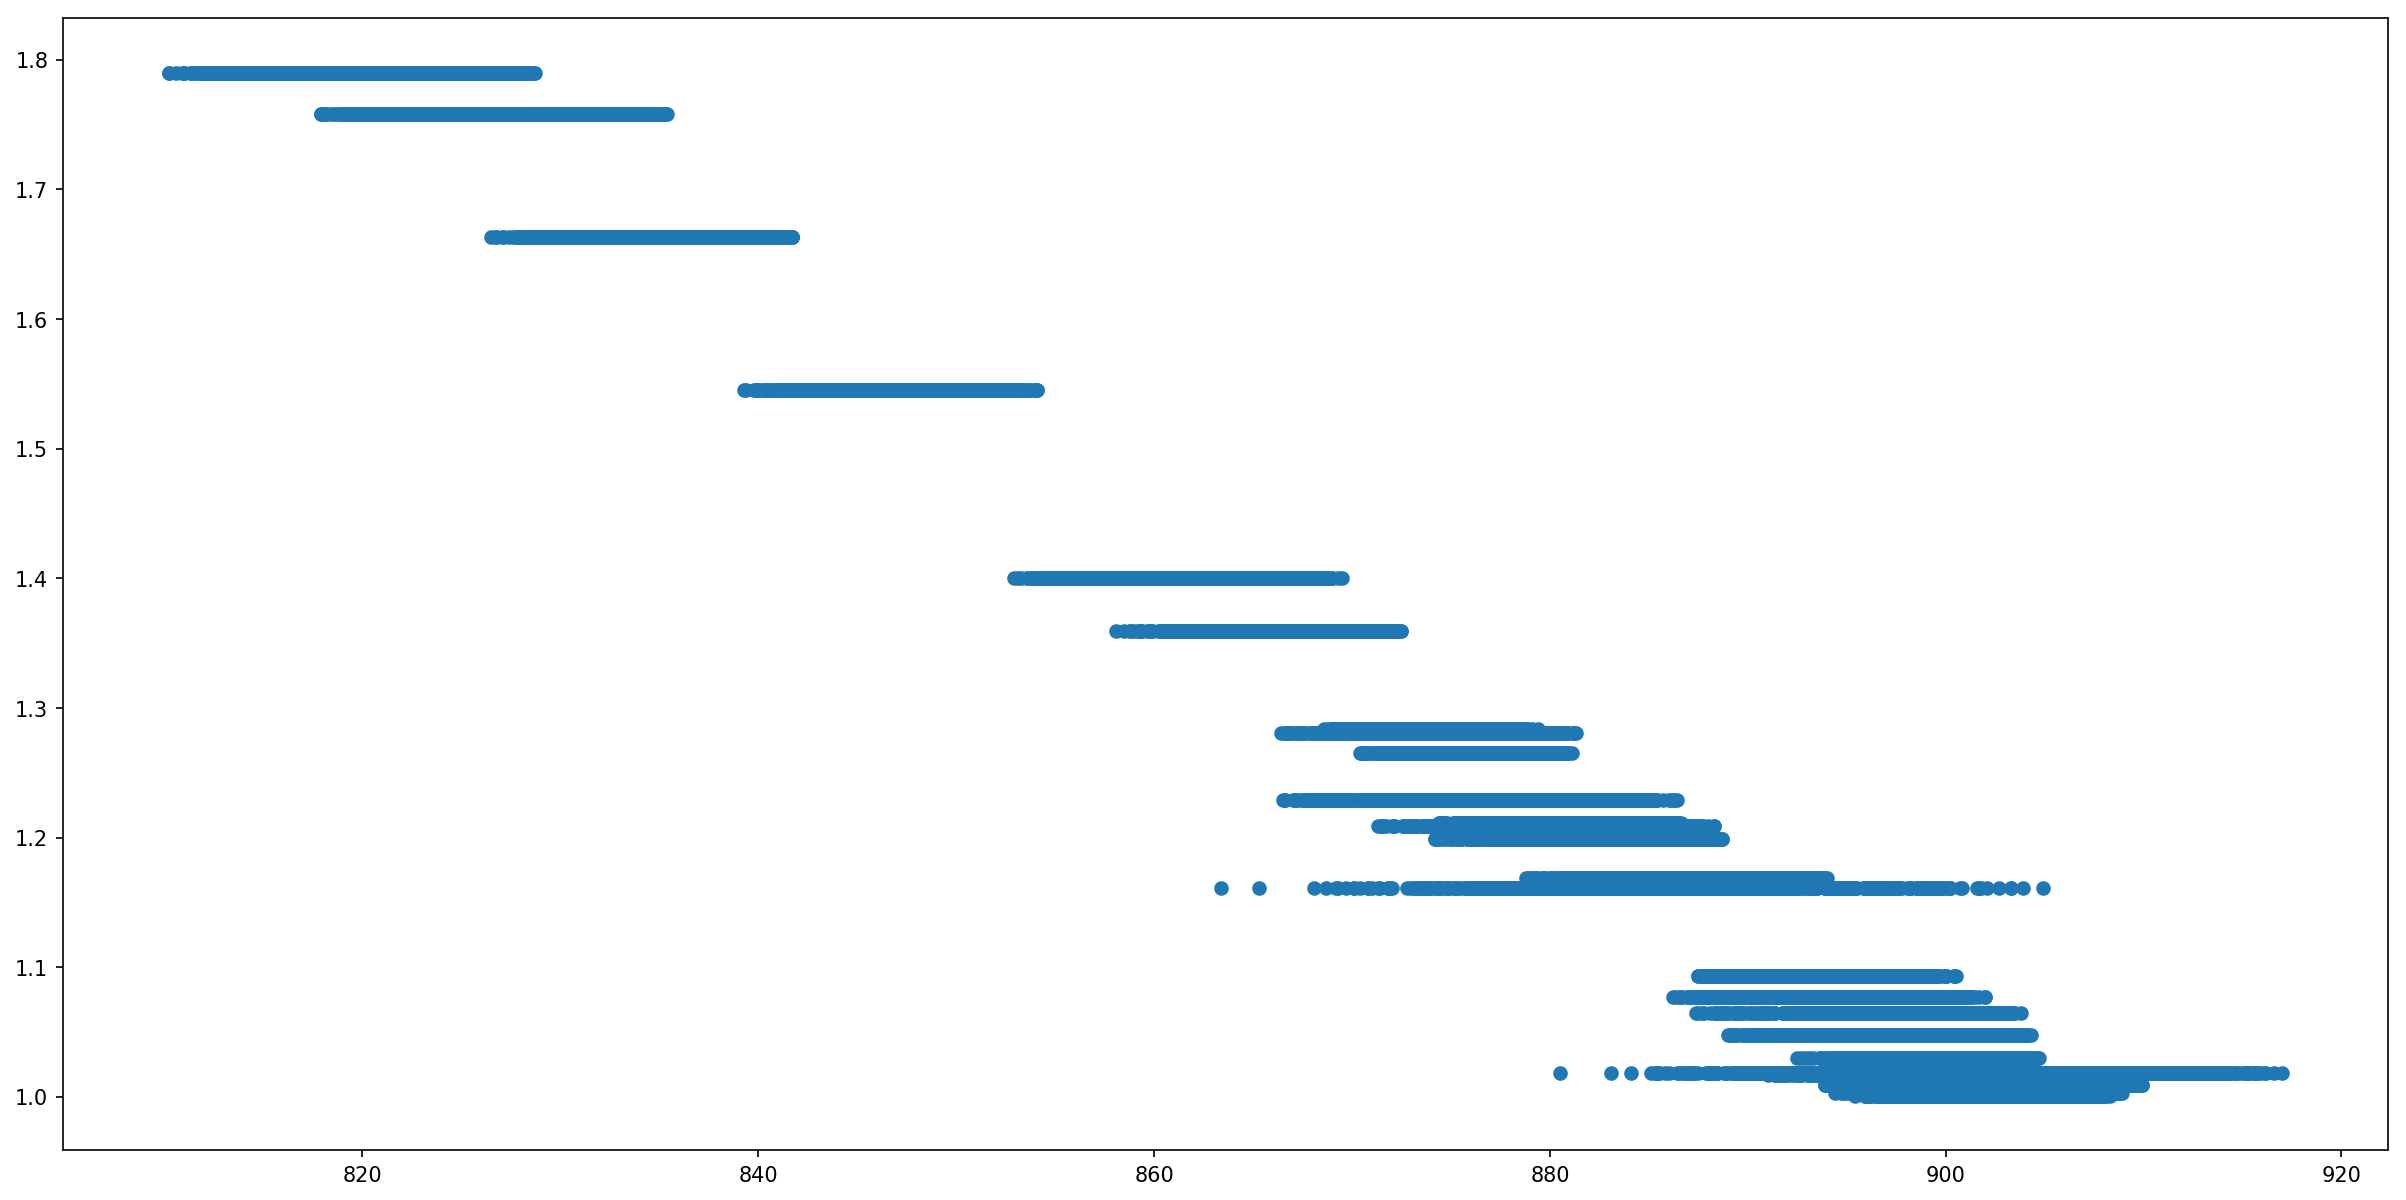

In [57]:
plt.figure(figsize=(20, 10), dpi=150)
plt.scatter(data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<100)&(data['PRESSAO ATMOSFERICA (hPa)']<950),:]['PRESSAO ATMOSFERICA (hPa)'],
           data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<100)&(data['PRESSAO ATMOSFERICA (hPa)']<950),:]['Altitude(metros)'])


In [58]:
data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<100)&(data['PRESSAO ATMOSFERICA (hPa)']<950),:].head(10)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
416808             1.161     86715.0    1       0 -15.789343 -47.925756   
416809             1.161     86715.0    1       1 -15.789343 -47.925756   
416810             1.161     86715.0    1       2 -15.789343 -47.925756   
416811             1.161     86715.0    1       3 -15.789343 -47.925756   
416812             1.161     86715.0    1       4 -15.789343 -47.925756   
416813             1.161     86715.0    1       5 -15.789343 -47.925756   
416814             1.161     86715.0    1       6 -15.789343 -47.925756   
416815             1.161     86715.0    1       7 -15.789343 -47.925756   
416816             1.161     86715.0    1       8 -15.789343 -47.925756   
416817             1.161     86715.0    1       9 -15.789343 -47.925756   

        Month           Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
416808      3  Brasília-A001                0.0                      886.9   
416809      3  Brasília-A001                0.0                      887.5   
416810      3  Brasília-A001                0.0                      887.9   
416811      3  Brasília-A001                0.0                      887.5   
416812      3  Brasília-A001                0.0                      887.0   
416813      3  Brasília-A001                0.0                      886.7   
416814      3  Brasília-A001                0.0                      886.7   
416815      3  Brasília-A001                0.0                      886.1   
416816      3  Brasília-A001                0.0                      886.1   
416817      3  Brasília-A001                0.0                      886.2   

        PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
416808                             886.9                             886.1   
416809                             887.5                             886.9   
416810                             887.9                             887.5   
416811                             887.9                             887.4   
416812                             887.5                             887.0   
416813                             887.0                             886.7   
416814                             886.8                             886.6   
416815                             886.7                             886.1   
416816                             886.3                             885.9   
416817                             886.2                             886.0   

        RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
416808                      NaN                   19.9   
416809                      NaN                   19.2   
416810                      NaN                   18.3   
416811                      NaN                   19.1   
416812                      NaN                   18.3   
416813                      NaN                   18.1   
416814                      NaN                   17.3   
416815                      NaN                   17.8   
416816                      NaN                   17.0   
416817                      NaN                   17.4   

        TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
416808                                 15.8                    20.1   
416809                                 16.0                    19.9   
416810                                 16.2                    19.7   
416811                                 16.3                    19.4   
416812                                 16.2                    19.0   
416813                                 16.0                    18.5   
416814                                 15.9                    18.1   
416815                                 16.2                    17.8   
416816                                 16.0                    17.9   
416817                                 16.2                    17.4   

        TEMPERATURA MINIMA (C)  TEMPERATURA

In [77]:
errors = data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<100)&(data['PRESSAO ATMOSFERICA (hPa)']<950),:].index.tolist()
print('Numero de resgitros que serão retirados: {}'.format(len(errors)))
data.loc[errors,'PRESSAO ATMOSFERICA (hPa)'] = np.nan

Numero de resgitros que serão retirados: 174384


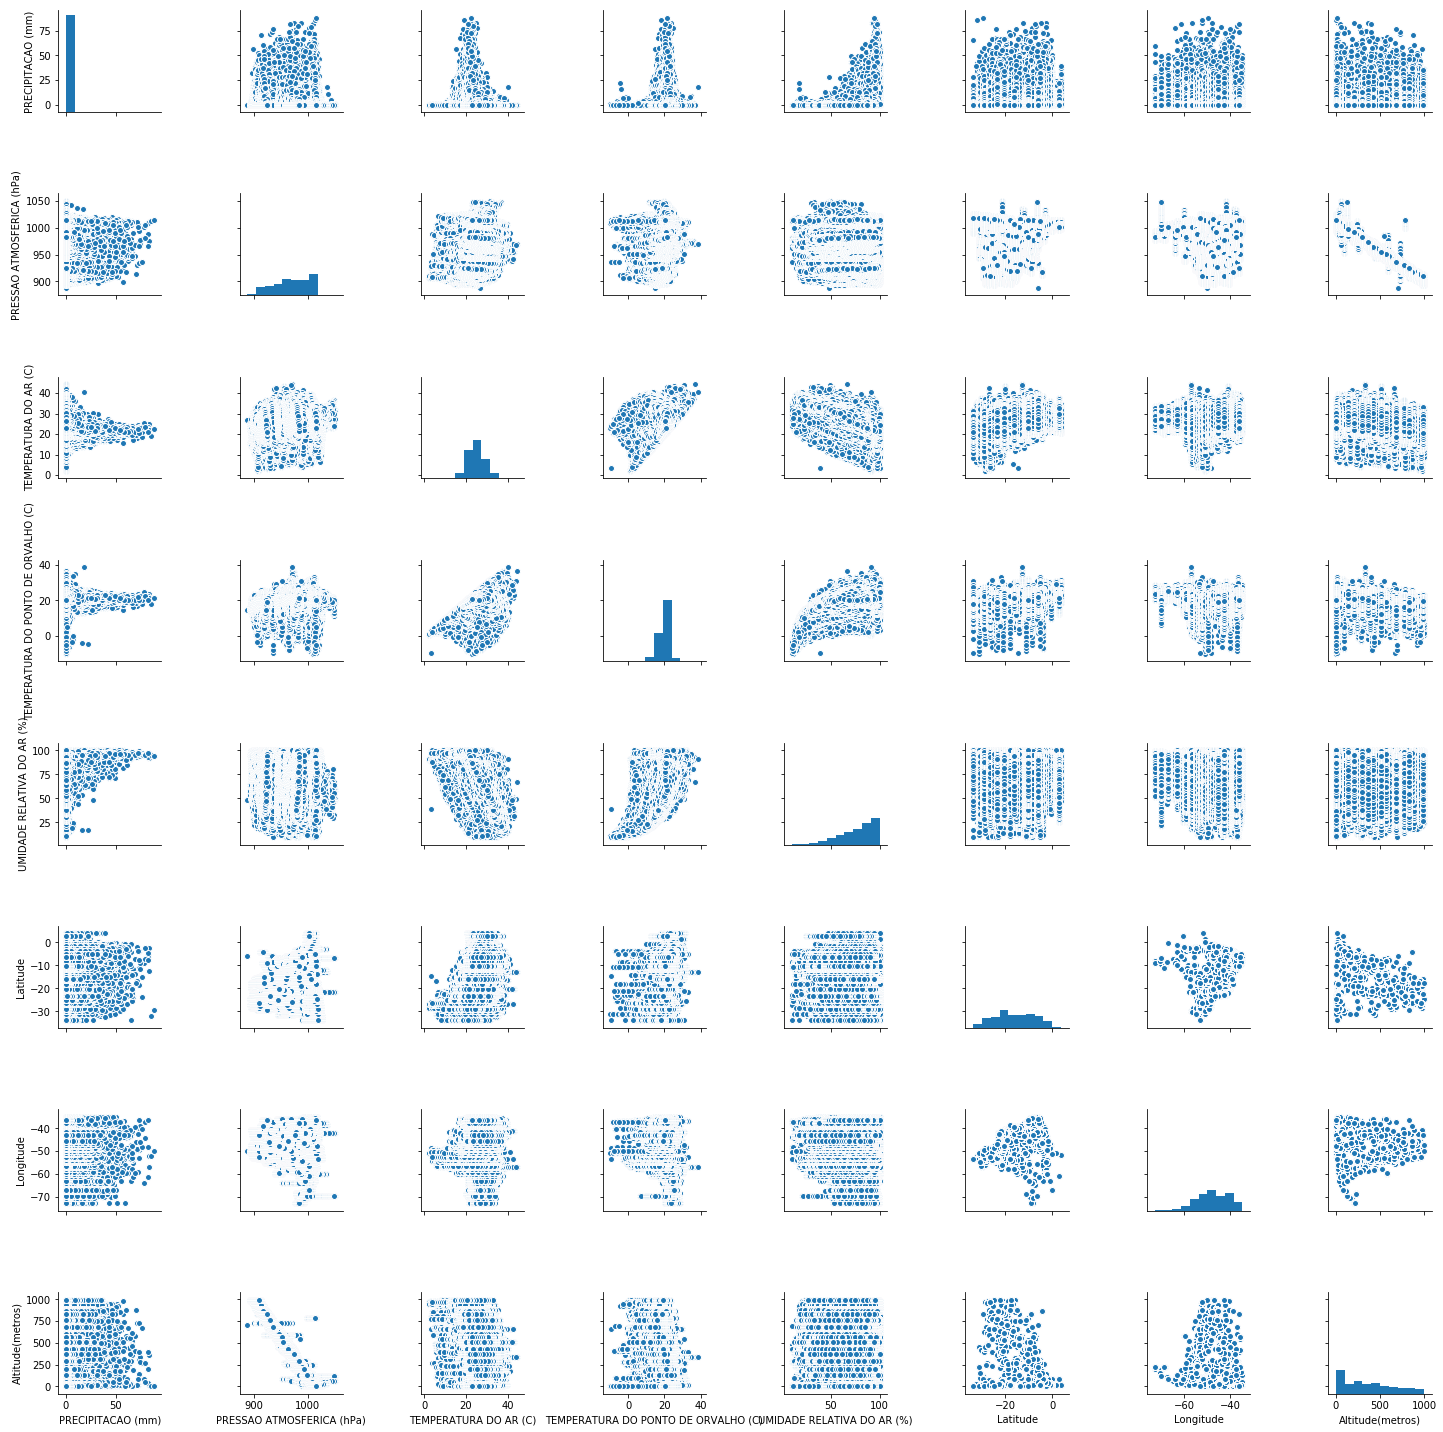

In [23]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

## Retirando os dados ausentes

### por trabalhamos com medias não iremos fazer recuperação dos dados ausentes apenas discarta-los.
### mas primeiro iremos descarta o atribulto de radiação global, que ja ele esta ausente em 50% da base

In [78]:
data.drop(columns=['RADIACAO GLOBAL (KJ/M2)','VENTO VELOCIDADE ','VENTO, DIRECAO (graus)','VENTO, RAJADA MAXIMA (m/s)'],inplace=True)

In [79]:
data.dropna(inplace=True)

In [80]:
data.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
month_num = str(3)
data = pd.read_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv').drop(columns=['Unnamed: 0'])
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257      3   
1             185.0     81963.0    1       1 -9.358353 -69.926257      3   
2             185.0     81963.0    1       2 -9.358353 -69.926257      3   
3             185.0     81963.0    1       9 -9.358353 -69.926257      3   
4             185.0     81963.0    1      10 -9.358353 -69.926257      3   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)   ...    TEMPERATURA MINIMA (C)  \
0                      988.2   ...                      22.7   
1                      988.6   ...                      22.4   
2                      989.6   ...                      22.2   
3                      989.1   ...                      22.1   
4                      989.7   ...                      22.2   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        22.4   
1                                        22.3   
2                                        21.8   
3                                        21.7   
4                                        21.8   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        21.9                        95.0   
1                                        21.6                        96.0   
2                                        21.5                        96.0   
3                                        21.6                        97.0   
4                                        21.6                        96.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  Year  \
0                               95.0                               94.0  2009   
1                               96.0                               95.0  2009   
2                               96.0                               95.0  2009   
3                               97.0                               96.0  2009   
4                               97.0                               96.0  2009   

                      Cidade  Estado  Regiao  
0  Parque Estadual Chandless    Acre   Norte  
1  Parque Estadual Chandless    Acre   Norte  
2  Parque Estadual Chandless    Acre   Norte  
3  Parque Estadual Chandless    Acre   Norte  
4  Parque Estadual Chandless    Acre   Norte  

[5 rows x 25 columns]

In [5]:
data.describe().T

count          mean  \
Altitude(metros)                            2643226.0    372.019717   
Codigo OMM                                  2643226.0  85329.300793   
Day                                         2643226.0     16.024680   
H(UTC)                                      2643226.0     11.555063   
Latitude                                    2643226.0    -15.800367   
Longitude                                   2643226.0    -47.595424   
Month                                       2643226.0      3.000000   
PRECIPITACAO (mm)                           2643226.0      0.229139   
PRESSAO ATMOSFERICA (hPa)                   2643226.0    970.385698   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2643226.0    970.676896   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2643226.0    970.096943   
TEMPERATURA DO AR (C)                       2643226.0     24.779644   
TEMPERATURA DO PONTO DE ORVALHO (C)         2643226.0     19.979971   
TEMPERATURA MAXIMA (C)                      2643226.0     25.397530   
TEMPERATURA MINIMA (C)                      2643226.0     24.198868   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2643226.0     20.507580   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2643226.0     19.479002   
UMIDADE RELATIVA DO AR (%)                  2643226.0     77.049962   
UMIDADE RELATIVA DO MAXIMA AR (%)           2643226.0     79.829818   
UMIDADE RELATIVA DO MINIMA AR (%)           2643226.0     74.142751   
Year                                        2643226.0   2011.580152   

                                                    std           min  \
Altitude(metros)                             285.215851      2.000000   
Codigo OMM                                  2271.582963  81609.000000   
Day                                            8.926817      1.000000   
H(UTC)                                         6.926997      0.000000   
Latitude                                       8.239579    -33.742297   
Longitude                                      6.886452    -72.786778   
Month                                          0.000000      3.000000   
PRECIPITACAO (mm)                              1.652432      0.000000   
PRESSAO ATMOSFERICA (hPa)                     31.393767    893.800000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              31.406187    893.800000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              31.381409    893.700000   
TEMPERATURA DO AR (C)                          4.048401      2.100000   
TEMPERATURA DO PONTO DE ORVALHO (C)            2.931803     -7.600000   
TEMPERATURA MAXIMA (C)                         4.224780      2.500000   
TEMPERATURA MINIMA (C)                         3.864815      1.400000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     2.872081     -5.500000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     3.016402     -9.900000   
UMIDADE RELATIVA DO AR (%)                    16.770112     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             15.535230     12.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             17.787434     10.000000   
Year                                           3.104081   2001.000000   

                                                     25%           50%  \
Altitude(metros)                              104.000000    338.000000   
Codigo OMM                                  81975.000000  86726.000000   
Day                                             8.000000     16.000000   
H(UTC)                                          6.000000     12.000000   
Latitude                                      -22.358052    -16.074740   
Longitude                                     -52.381980    -48.137377   
Month                                           3.000000      3.000000   
PRECIPITACAO (mm)                               0.000000      0.000000   
PRESSAO ATMOSFERICA (hPa)                     947.700000    973.500000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              948.000000    973.800000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              947.400000    973.

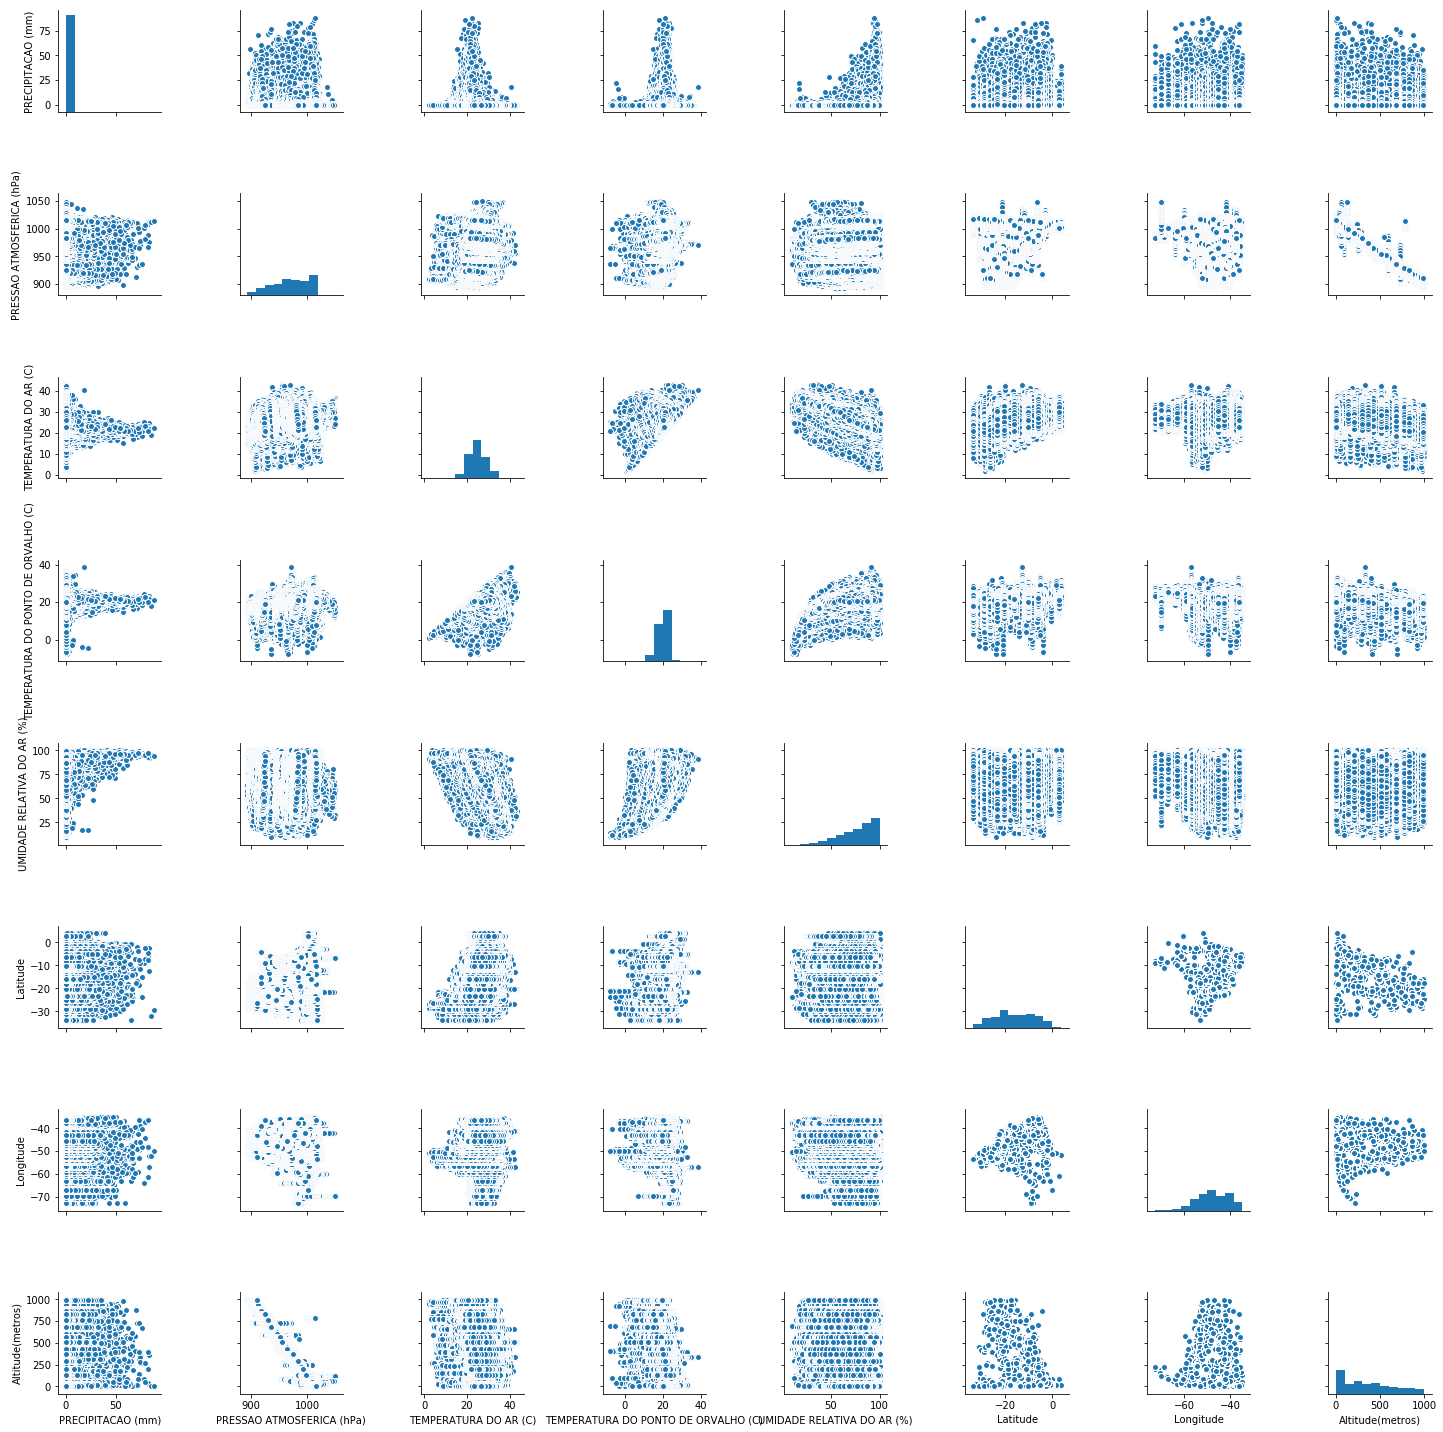

In [82]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

### Fazendo a base de dados com as medias mensais de cada estação

In [6]:
data_mean = data.groupby(['Nome']).agg('mean')
data_mean.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_mean.csv')
data_mean.head(5)

Altitude(metros)  Codigo OMM        Day     H(UTC)  \
Nome                                                                      
Abrolhos-A422                    21.0     86765.0  14.704331  11.388951   
Acaraú-A360                      67.0     81755.0  15.944657  11.498538   
Afonso Cláudio-A657             507.0     86827.0  14.907854  11.458787   
Aimorés-A534                    288.0     86803.0  16.066677  11.580670   
Alegre-A617                     129.0     86828.0  15.894803  11.501471   

                      Latitude  Longitude  Month  PRECIPITACAO (mm)  \
Nome                                                                  
Abrolhos-A422       -17.963016 -38.703288    3.0           0.071183   
Acaraú-A360          -3.121067 -40.087288    3.0           0.232306   
Afonso Cláudio-A657 -20.104194 -41.106861    3.0           0.069129   
Aimorés-A534        -19.532768 -41.090801    3.0           0.122863   
Alegre-A617         -20.750412 -41.488852    3.0           0.287855   

                     PRESSAO ATMOSFERICA (hPa)  \
Nome                                             
Abrolhos-A422                      1011.332787   
Acaraú-A360                        1003.439505   
Afonso Cláudio-A657                 956.355793   
Aimorés-A534                        985.499220   
Alegre-A617                         998.050469   

                     PRESSAO ATMOSFÉRICA MAXIMA (hPa)     ...       \
Nome                                                      ...        
Abrolhos-A422                             1011.558218     ...        
Acaraú-A360                               1003.720292     ...        
Afonso Cláudio-A657                        956.593196     ...        
Aimorés-A534                               985.767227     ...        
Alegre-A617                                998.315688     ...        

                     TEMPERATURA DO AR (C)  \
Nome                                         
Abrolhos-A422                    27.030316   
Acaraú-A360                      26.381057   
Afonso Cláudio-A657              24.390980   
Aimorés-A534                     26.290748   
Alegre-A617                      26.024709   

                     TEMPERATURA DO PONTO DE ORVALHO (C)  \
Nome                                                       
Abrolhos-A422                                  22.668434   
Acaraú-A360                                    22.765309   
Afonso Cláudio-A657                            18.407465   
Aimorés-A534                                   20.055926   
Alegre-A617                                    20.464239   

                     TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
Nome                                                                  
Abrolhos-A422                     27.375736               26.695280   
Acaraú-A360                       26.960810               25.830551   
Afonso Cláudio-A657               25.235303               23.658320   
Aimorés-A534                      27.001682               25.659260   
Alegre-A617                       26.712817               25.390895   

                     TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         23.068684   
Acaraú-A360                                           23.198020   
Afonso Cláudio-A657                                   19.053655   
Aimorés-A534                                          20.624086   
Alegre-A617                                           21.030312   

                     TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         22.279678   
Acaraú-A360                                           22.342992   
Afonso Cláudio-A657                                   17.823289   
Aimorés-A534                                          19.517097   
Alegre-A617                              

In [7]:
data_mean['Precipitação Acum.(mm)'] = data.groupby(['Nome','Year']).agg('sum').groupby('Nome').agg('mean')['PRECIPITACAO (mm)']

data_mean.to_csv('./Tempo-Clima/Dados/Brasil_3_mean.csv')

In [8]:
data_mean.describe().T

count          mean          std  \
Altitude(metros)                            458.0    365.521834   282.831588   
Codigo OMM                                  458.0  85201.056769  2325.371846   
Day                                         458.0     16.040708     0.567796   
H(UTC)                                      458.0     11.562026     0.142580   
Latitude                                    458.0    -15.371909     8.276341   
Longitude                                   458.0    -48.015097     7.263208   
Month                                       458.0      3.000000     0.000000   
PRECIPITACAO (mm)                           458.0      0.233774     0.120631   
PRESSAO ATMOSFERICA (hPa)                   458.0    971.032329    30.940823   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            458.0    971.324430    30.954617   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            458.0    970.742490    30.928821   
TEMPERATURA DO AR (C)                       458.0     24.845138     2.107364   
TEMPERATURA DO PONTO DE ORVALHO (C)         458.0     20.082610     2.209935   
TEMPERATURA MAXIMA (C)                      458.0     25.462898     2.098516   
TEMPERATURA MINIMA (C)                      458.0     24.264598     2.118605   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  458.0     20.611891     2.178833   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  458.0     19.580406     2.243949   
UMIDADE RELATIVA DO AR (%)                  458.0     77.226385     6.541520   
UMIDADE RELATIVA DO MAXIMA AR (%)           458.0     80.006527     6.338988   
UMIDADE RELATIVA DO MINIMA AR (%)           458.0     74.318488     6.717542   
Year                                        458.0   2011.927074     1.310697   
Precipitação Acum.(mm)                      458.0    162.837039    89.156286   

                                                     min           25%  \
Altitude(metros)                                2.000000    108.250000   
Codigo OMM                                  81609.000000  81950.250000   
Day                                            14.530171     15.904915   
H(UTC)                                         11.265600     11.497208   
Latitude                                      -33.742297    -21.949157   
Longitude                                     -72.786778    -52.955565   
Month                                           3.000000      3.000000   
PRECIPITACAO (mm)                               0.025538      0.150367   
PRESSAO ATMOSFERICA (hPa)                     903.204705    949.782916   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              903.464998    950.079018   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              902.942219    949.497964   
TEMPERATURA DO AR (C)                          17.944418     23.557117   
TEMPERATURA DO PONTO DE ORVALHO (C)            14.172366     18.408952   
TEMPERATURA MAXIMA (C)                         18.617067     24.184033   
TEMPERATURA MINIMA (C)                         17.317580     22.986510   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     14.760699     18.935538   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     13.619562     17.871061   
UMIDADE RELATIVA DO AR (%)                     50.641129     74.273068   
UMIDADE RELATIVA DO MAXIMA AR (%)              53.309140     77.211379   
UMIDADE RELATIVA DO MINIMA AR (%)              47.989247     70.959614   
Year                                         2007.876050   2011.461863   
Precipitação Acum.(mm)                         19.000000    103.378750   

                                                     50%           75%  \
Altitude(metros)                              318.500000    557.250000   
Codigo OMM                                  86710.000000  86854.750000   
Day                                            15.973041     16.159549   
H(UTC)                                         11.510513     11.585007   
Latitude                                      -15.290187     -8.505388   
Longitude                                     -48.228444

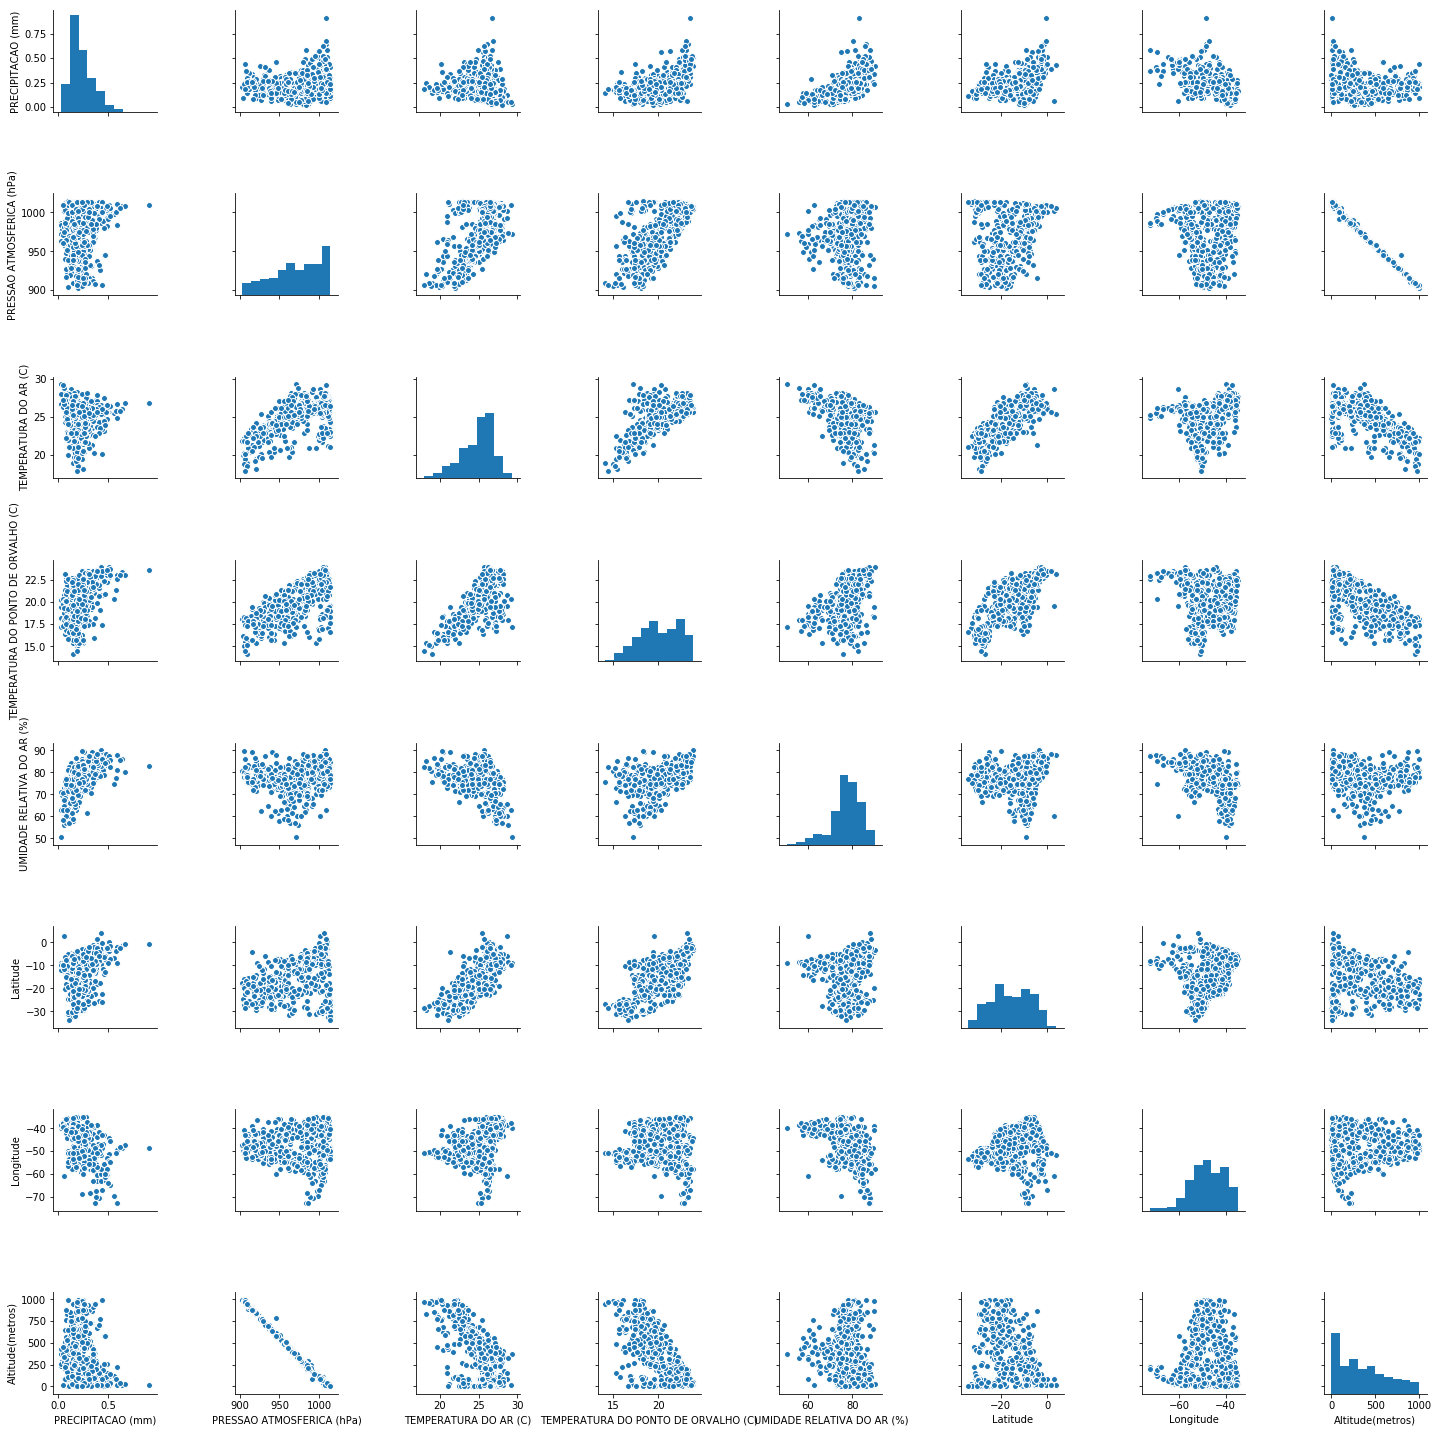

In [87]:
sns.pairplot(data_mean[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [88]:
target_wanderlay = ['UMIDADE RELATIVA DO AR (%)']
features_UR_wanderlay = data_mean.columns.tolist()
features_UR_wanderlay.remove('Day')
features_UR_wanderlay.remove('Month')
features_UR_wanderlay.remove('Codigo OMM')
features_UR_wanderlay.remove('Year')
features_UR_wanderlay.remove('H(UTC)')
#features_UR_wanderlay.remove('VENTO VELOCIDADE ')
#features_UR_wanderlay.remove('VENTO, DIRECAO (graus)')
#features_UR_wanderlay.remove('VENTO, RAJADA MAXIMA (m/s)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MINIMA AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MAXIMA AR (%)')
features_UR_wanderlay.remove('TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO AR (C)')
#features_UR_wanderlay.remove('TEMPERATURA MAXIMA (C)')
#features_UR_wanderlay.remove('TEMPERATURA MINIMA (C)')
features_UR_wanderlay.remove('PRECIPITACAO (mm)')
features_UR_wanderlay.remove('PRESSAO ATMOSFERICA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MAXIMA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MINIMA (hPa)')




features_UR_wanderlay

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'TEMPERATURA MAXIMA (C)',
 'TEMPERATURA MINIMA (C)']

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_mean[features_UR_wanderlay], data_mean[target_wanderlay],test_size=.25)

In [90]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

In [93]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)


In [94]:
import sklearn.metrics as metrics
print('Variance: {}'.format(metrics.explained_variance_score(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro absoluto medio: {}'.format(metrics.mean_absolute_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro quadrado medio: {}'.format(metrics.mean_squared_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('Erro absoluto mediano: {}'.format(metrics.median_absolute_error(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))
print('R2 Score: {}'.format(metrics.r2_score(scaler_y.inverse_transform(y_test).ravel(),scaler_y.inverse_transform([y_pred,]).ravel())))

Variance: 0.8181430022452816
Erro absoluto medio: 1.9841208190186916
Erro quadrado medio: 5.936616096446852
Erro absoluto mediano: 1.5115541424424777
R2 Score: 0.8175874278555522


In [95]:
errors=abs(scaler_y.inverse_transform(y_test).ravel()-scaler_y.inverse_transform([y_pred,]))
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Error(UR_true - UR_pred)
MIN: 0.007988917410500562 	MAX: 7.127411203430128 	MEAN: 1.9841208190186916	Std: 1.4141713729189433


In [96]:
df_rest = pd.DataFrame(data = scaler_y.inverse_transform(y_test).ravel(),columns=['Y_true'])
df_rest['Y_pred'] = scaler_y.inverse_transform(y_test).ravel()
df_rest.sort_values(['Y_pred','Y_true']).head(5)

Y_true     Y_pred
101  60.328436  60.328436
70   63.013445  63.013445
69   63.536095  63.536095
43   64.844949  64.844949
79   65.425127  65.425127

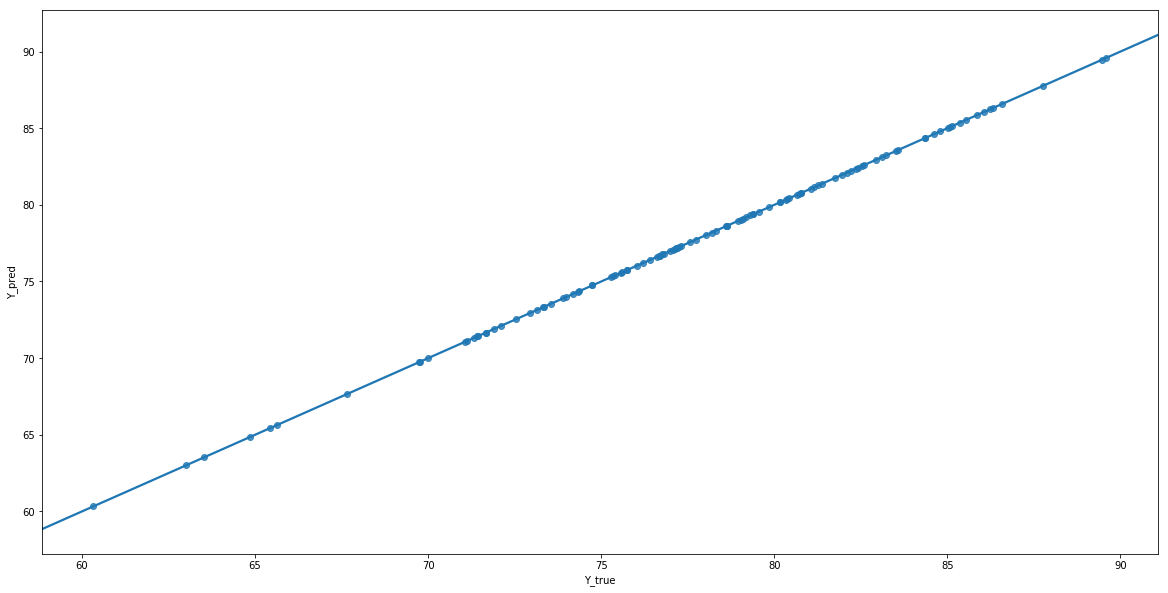

In [97]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(x="Y_true", y="Y_pred", data=df_rest,ax=ax)

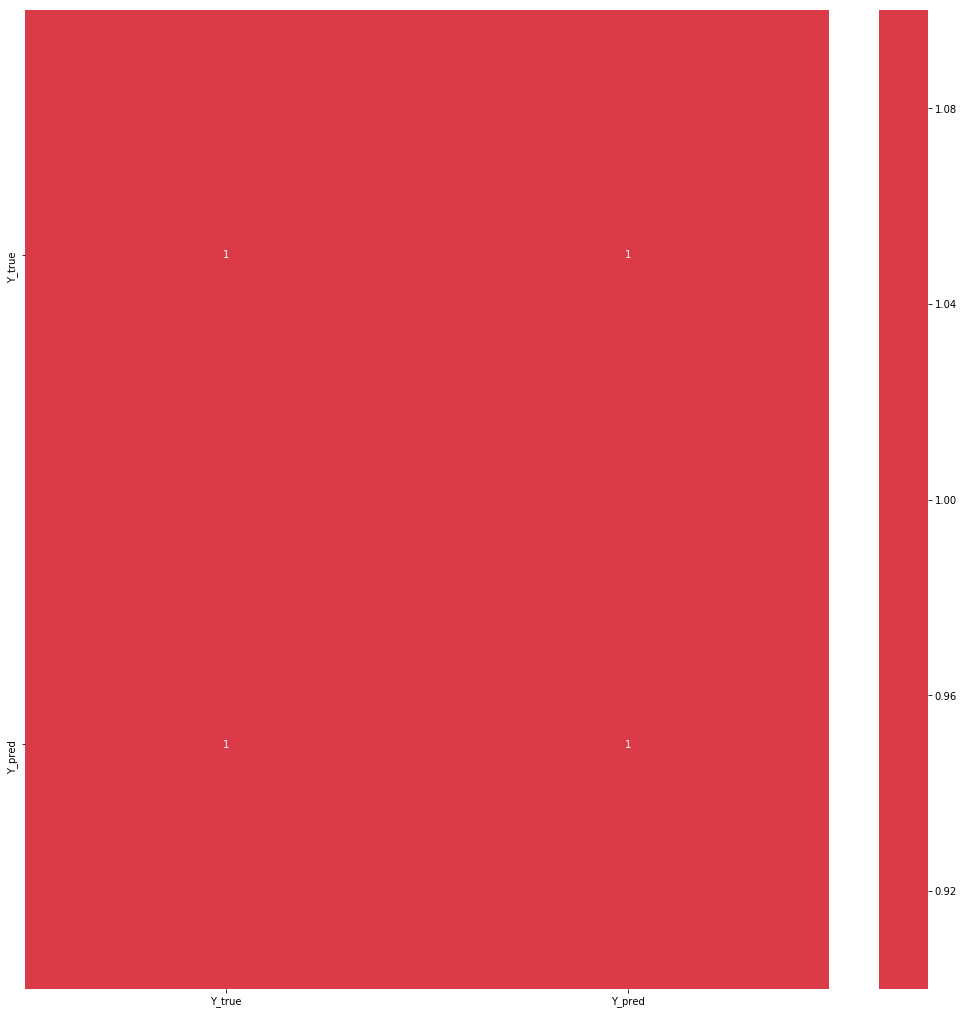

In [98]:
cor_matrix = df_rest.corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()